In [ ]:
%run "catalog_common.py" 
ID_header('Make Blog Images', incl_links=False,subtitle='Notebook not published')
set_page_param()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import gca, mpl
import os
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("deep")

# from itables import init_notebook_mode
# init_notebook_mode(all_interactive=True)
# from itables import show as iShow
# import itables.options as opt

In [4]:
master_df = ana_set.Full_set(repo = repo_name, outdir='../common/').get_set(verbose=False)
master_df = master_df[(master_df.date.dt.year>2010)&\
                      (master_df.date.dt.year<=datetime.datetime.now().year)]
master_df = master_df[master_df.in_std_filtered]

In [5]:
image_dir = './blog_images'

   
## Contents:
**[General Statistics](#gen_stats)**
Number of disclosures per week, geographic spread

**[Chemicals used](#chems)** (in development)

**[Water Use](#water_use)**
Weekly: Median, Total and Max water used

**[Proppant Use](#proppant)**
Weekly: Sand, other proppants

**[Companies represented](#companies)** (in development)

**[Downloadable Data Sets](#data)**
water and sand use, by disclosure

---
<a id='gen_stats'></a>
# General Stats

The figures below use filtered data (no duplicate disclosures or records) for Jan 1, 2011 to the most recently published data.  Because of publishing delays, the most recent months are probably under represented.

**In the early data, roughly 2011 - May 2013, the bulk download does not include chemical records.**  However, the PDF files for that period are still served through ["Find_A-Well"](http://fracfocusdata.org/DisclosureSearch/Search.aspx) and document the reported chemicals.  Some projects have attempted to scrape those chemical records into an organized data set but they come with caveats (such as they may contain records that the industry no longer considers valid; or they are incomplete because many of the PDFs are poorly formatted and therefore difficult to scrape). See the [Auxillary Data](Open-FF_Auxillary_Data.html) page for more details.

<a id='num_disc'></a>

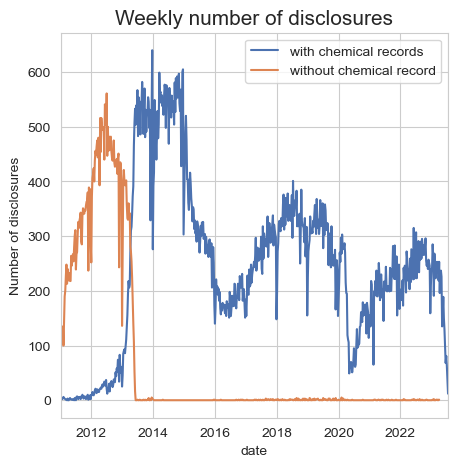

In [6]:
alldf = master_df[master_df.ingKeyPresent].groupby('UploadKey',as_index=False)[['date','TotalBaseWaterVolume',
                                                                                'APINumber']].first()
gb = alldf.groupby('date').size()
allwk_sum = gb.resample("W").sum()
ax = allwk_sum.plot(figsize=(5,5), ylabel='Number of disclosures',label='with chemical records');
# ax.set_title('Orange: Without chemical records; Blue: with chemical records',fontsize=10);
ax.set_title('Weekly number of disclosures',fontsize=15);
alldfv1 = master_df[~master_df.ingKeyPresent].groupby('UploadKey',as_index=False)[['date','TotalBaseWaterVolume']].first()
gbv1 = alldfv1.groupby('date').size()
allwk_sumv1 = gbv1.resample("W").sum()
allwk_sumv1.plot(ax=ax,label='without chemical record');
ax.legend()
plt.savefig(os.path.join(image_dir,'number_disc_all_states.jpg'))


## Where are they?
For detailed maps of each state, see the ["States and Counties"](Open-FF_States_and_Counties.html) pages.

In [7]:
gb = master_df[master_df.loc_within_state=='YES'].groupby(['bgStateName',
                                                           'UploadKey'],as_index=False)['bgCAS'].count()
gb = gb.groupby('bgStateName',as_index=False)['UploadKey'].count().sort_values('UploadKey',ascending=False)

gb['group'] = pd.cut(gb.UploadKey,bins=[0,100,1000,5000,20000,200000],labels=['< 100 disclosures',
                                                                              '< 1,000 disclosures',
                                                                              '< 5,000 disclosures',
                                                                              '< 20,000 disclosures',
                                                                              '> 20,000 disclosures'])
gb['State'] =gb.bgStateName.str.title()# + ' - ' + gb.UploadKey.astype(str)
totall = gb.UploadKey.sum()
gb['Perc'] = gb.UploadKey/totall *100
gb.Perc = gb.Perc.round(2)
# gb

In [8]:
#NOT USED

# gb1 = gb.groupby('group')['UploadKey'].sum()
# # gb1 = gb1.reset_index()
# ax = gb1.plot.pie(label='');

# plt.savefig(os.path.join(image_dir,'number_disc_pie.jpg'),
#            bbox_inches='tight')

In [9]:
gb2 = gb.groupby('group',as_index=True)['State'].apply(list)
gb2 = gb2.reset_index()
for i,row in gb2.iterrows():
    print(row.group)
    print(row.State)

< 100 disclosures
['Kentucky', 'Michigan', 'Nebraska', 'Nevada', 'Illinois', 'Indiana', 'Idaho']
< 1,000 disclosures
['Kansas', 'Montana', 'Virginia', 'Alaska', 'Mississippi', 'Alabama']
< 5,000 disclosures
['Louisiana', 'California', 'Ohio', 'West Virginia', 'Arkansas']
< 20,000 disclosures
['Colorado', 'Oklahoma', 'North Dakota', 'New Mexico', 'Pennsylvania', 'Wyoming', 'Utah']
> 20,000 disclosures
['Texas']


In [10]:
# NOT USED

# import numpy as np
# import matplotlib.pyplot as plt
# def plot_table(data, # formatted as list of rows, first row is labels of second, third.. cols
#                figsize = (3,0.4),
#                table_scale = 1.2,
#                filename = 'test.png'):
#     print(data)
#     fig_background_color = 'black'
#     # fig_border = 'steelblue'

#     column_headers = data.pop(0)
#     row_headers = [x.pop(0) for x in data]
#     # Table data needs to be non-numeric text. Format the data while I'm at it.
#     # cell_text = []
#     # for row in data:
#     #     cell_text.append([f'{x:,}' for x in row])# Get some lists of color specs for row and column headers
#     rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
#     ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
#     # Create the figure. Setting a small pad on tight_layout
#     # seems to better regulate white space. Sometimes experimenting
#     # with an explicit figsize here can produce better outcome.
#     plt.figure(linewidth=2,
#                edgecolor=fig_background_color,
#                facecolor=fig_background_color,
#                tight_layout={'pad':1},
#                figsize=figsize
#               )
#     # Add a table at the bottom of the axes
#     the_table = plt.table(cellText=data,
#                           rowLabels=row_headers,
#                           rowColours=rcolors,
#                           rowLoc='right',
#                           colColours=ccolors,
#                           colLabels=column_headers,
#                           cellLoc='right',
#                           loc='bottom')# Scaling is the only influence we have over top and bottom cell padding.
#     # Make the rows taller (i.e., make cell y scale larger).
#     the_table.scale(1, table_scale)# Hide axes
#     ax = plt.gca()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)# Hide axes border
#     plt.box(on=None)
#     plt.draw()# Create image. plt.savefig ignores figure edge and face colors, so map them.
#     #fig = plt.gcf()
#     plt.savefig(os.path.join(image_dir,filename),dpi=300)
    
# data = [['Disclosures','Percent of Total']]
# for i,row in gb.iterrows():
#     data.append([row.State,row.UploadKey,row.Perc])
# plot_table(data,filename="number_disc_table.png")

# # s = gb[['State','UploadKey','Perc']].to_html()
# # with open(os.path.join(image_dir,'number_disc_table.html'),'w') as f:
# #     f.write(s)


---
<a id='chems'></a>
# Chemicals used

### Creating the stats used on the chemical: overall quantity page

Some links to truck cargo capacity:
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj-u6uRhKL_AhVoHDQIHcPrD5gQFnoECA0QAQ&url=https%3A%2F%2Fwww.freightwaves.com%2Fnews%2Fhow-much-weight-can-a-big-rig-carry&usg=AOvVaw1kfcixBDcZtLJmoGh2bbin

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj-u6uRhKL_AhVoHDQIHcPrD5gQFnoECA0QAQ&url=https%3A%2F%2Fwww.freightwaves.com%2Fnews%2Fhow-much-weight-can-a-big-rig-carry&usg=AOvVaw1kfcixBDcZtLJmoGh2bbin

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj-u6uRhKL_AhVoHDQIHcPrD5gQFnoECFcQAQ&url=https%3A%2F%2Flogitydispatch.com%2Fhow-much-weight-can-a-truck-carry%2F&usg=AOvVaw2sL2gVVjfDna0O1GB24EoL


In [20]:
c = master_df.in_std_filtered & master_df.ingKeyPresent
# cy = master_df.date.dt.year==2022
# ctbwv = master_df.TotalBaseWaterVolume>1000000
tot = master_df.groupby('UploadKey')[['PercentHFJob','calcMass']].sum().reset_index()
tot.columns = ['UploadKey','TotPerc','totCalcMass']
tot = tot[tot.TotPerc > 90]
print(f'Tot: {len(tot)}')
# cw = (master_df.bgCAS=='7732-18-5') | master_df.is_water_carrier
cw =  master_df.is_water_carrier  # keep water that is not carrier in the list
wat = master_df[cw&c].groupby('UploadKey')['PercentHFJob'].sum().reset_index()
wat.columns = ['UploadKey','WatPerc']
print(f'Wat: {len(wat)}')
csand = (master_df.bgCAS.isin(['14808-60-7','66402-68-4','1302-93-8',
                        '1302-76-7','1344-28-1','1318-16-7','308075-07-2','14464-46-1','1302-74-5']))
sand = master_df[csand&c].groupby('UploadKey')['PercentHFJob'].sum().reset_index()
sand.columns = ['UploadKey','SandPerc']
print(f'Sand: {len(sand)}')
cgas = master_df.bgCAS.isin(['124-38-9','7727-37-9'])
gas = master_df[cgas&c].groupby('UploadKey')['PercentHFJob'].sum().reset_index()
gas.columns = ['UploadKey','GasPerc']
print(f'Gas: {len(gas)}')

Tot: 12711
Wat: 148749
Sand: 152268
Gas: 3420


In [21]:
t = pd.merge(tot,wat, on='UploadKey', how='inner')
t = pd.merge(t,sand,on='UploadKey', how='inner')
t = pd.merge(t,gas,on='UploadKey', how='left')
t.GasPerc.fillna(0,inplace=True)
t['ChemPerc'] = t.TotPerc - t.WatPerc - t.SandPerc - t.GasPerc
#print(t.ChemPerc.describe())
perc = [2,10,25,50,75,90,95,99,99.5]
pd.DataFrame({'perc':perc,'res':np.percentile(t.ChemPerc,perc)})

perc        res
0   2.0   0.020179
1  10.0   0.044414
2  25.0   0.089180
3  50.0   0.225646
4  75.0   0.439543
5  90.0   0.957373
6  95.0   2.076797
7  99.0   9.900598
8  99.5  11.474472

In [12]:
# get the median frack size in 2022
cTBWV = master_df.TotalBaseWaterVolume>0
gb2022 = master_df[c&cTBWV&(master_df.date.dt.year==2022)].groupby('UploadKey')['TotalBaseWaterVolume'].first()
watvol = gb2022.median()
totmass = watvol*8.34/0.8502
print(f'Water vol: {watvol}')
print(f'Number of disclosures in these calculations: {len(gb2022)}')
print(f'Total mass for a frack based on the median TBWV: {totmass:1,}')
print(f'Mass of all non-sand/water chemicals: {totmass*0.0078:1,} or # big rigs: {totmass*0.0078/40000:1,}')

vol90 = np.percentile(gb2022,[90])[0]
print(f'\nVolume of 90th percentile: {vol90:,}')
totmass90 = vol90*8.34/0.8502
# print(f'Number of disclosures in these calculations: {len(gb2022)}')
print(f'Total mass for a frack based on the 90% TBWV: {totmass90:1,}')
print(f'Mass of all non-sand/water chemicals: {(totmass90*0.0078):,}')

totmassrec = len(master_df[master_df.calcMass>0])
totrec = len(master_df)
print(f'Fraction of records with calculated mass: {totmassrec/totrec}')


Water vol: 16129932.0
Number of disclosures in these calculations: 12691
Total mass for a frack based on the median TBWV: 158,225,867.88990825
Mass of all non-sand/water chemicals: 1,234,161.7695412843 or # big rigs: 30.854044238532108

Volume of 90th percentile: 27,680,558.0
Total mass for a frack based on the 90% TBWV: 271,531,232.32180667
Mass of all non-sand/water chemicals: 2,117,943.612110092
Fraction of records with calculated mass: 0.7653848606935763


---
## chemical abundance summary graphs



In [13]:
t = master_df[(master_df.in_std_filtered)&(master_df.ingKeyPresent)][['bgCAS','epa_pref_name','PercentHFJob','UploadKey','is_water_carrier']].copy()
# make sure even non-documented water is counted as water
t.bgCAS = np.where(t.is_water_carrier,'7732-18-5',t.bgCAS)
t.PercentHFJob.fillna(0,inplace=True)
numUpk  = len(t.UploadKey.unique())
gb = t.groupby(['bgCAS','UploadKey'],as_index=False)['PercentHFJob'].sum()
gb.PercentHFJob = np.where(gb.PercentHFJob>0,gb.PercentHFJob,-1)

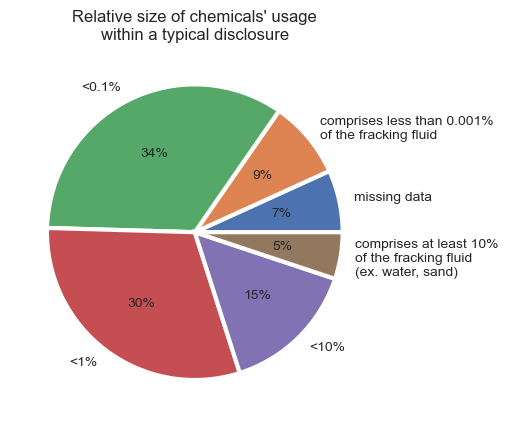

In [14]:
gb1 = gb.groupby('bgCAS',as_index=False)['PercentHFJob'].median()
# gb1 = gb.groupby('bgCAS',as_index=False)['PercentHFJob'].quantile(0.9)
gb1['groups'] = pd.cut(gb1.PercentHFJob, bins=[-2,0,.00001,0.001,0.01,0.1,2],
                      labels=['missing data','comprises less than 0.001% \nof the fracking fluid', '<0.1%',
                              '<1%','<10%','comprises at least 10%\nof the fracking fluid\n(ex. water, sand)'])
gb_PHFJ = gb1.groupby('groups')['bgCAS'].count()
ax = gb_PHFJ.plot.pie(autopct='%.0f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
ax.set_ylabel('')
ax.set_title("Relative size of chemicals' usage\nwithin a typical disclosure");

### Half of chemicals' typical use is > 0.1 % of the fracking fluid


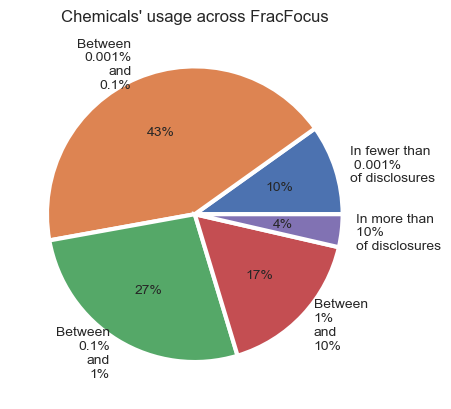

In [15]:
gb2 = gb.groupby('bgCAS',as_index=False)['UploadKey'].count()
gb2['frac_of_disc'] = gb2.UploadKey/numUpk
gb2['groups'] = pd.cut(gb2.frac_of_disc, bins=[0,.00001,0.001,0.01,0.10,2],
                      labels=['In fewer than\n 0.001% \nof disclosures', 
                              'Between\n0.001%\nand\n0.1%',
                              'Between\n0.1%\nand\n1%',
                              'Between\n1%\nand\n10%',
                              'In more than \n10% \nof disclosures'])
gb_acrossFF = gb2.groupby('groups')['bgCAS'].count()
ax = gb_acrossFF.plot.pie(autopct='%.0f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       # textprops={'size': 'large'}
                         )
ax.set_ylabel('')
ax.set_title("Chemicals' usage across FracFocus");

In [16]:
gb_acrossFF

groups
In fewer than\n 0.001% \nof disclosures    132
Between\n0.001%\nand\n0.1%                 575
Between\n0.1%\nand\n1%                     359
Between\n1%\nand\n10%                      224
In more than \n10% \nof disclosures         48
Name: bgCAS, dtype: int64

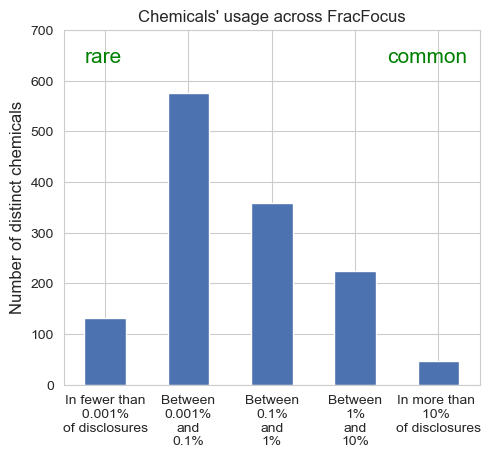

In [17]:
ax = gb_acrossFF.plot.bar(figsize=(5,5),ylim=(0,700))
ax.set_ylabel('Number of distinct chemicals',fontsize=12)
ax.set_xlabel('')
ax.set_title("Chemicals' usage across FracFocus");
ax.text(0.97, 0.95, 'common',
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)
ax.text(0.05, 0.95, 'rare',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='green', fontsize=15)

plt.tight_layout()
plt.xticks(rotation = 0,fontsize=10) ;
plt.savefig(os.path.join(image_dir,'chemUsageAcrossFF.jpg'),dpi=150)


In [18]:
gb2[gb2.frac_of_disc>=.1]

bgCAS  UploadKey  frac_of_disc  \
30       10222-01-2      16754      0.104797   
38         104-55-2      25981      0.162512   
42       10486-00-7      17479      0.109332   
56         107-19-7      46786      0.292648   
57         107-21-1      72022      0.450501   
95         111-30-8      56351      0.352478   
102        111-76-2      31930      0.199724   
154      12125-02-9      50138      0.313615   
187     127087-87-0      20857      0.130461   
216       1310-58-3      31312      0.195858   
217       1310-73-2      57157      0.357520   
243       1338-43-8      34355      0.214892   
301      14808-60-7     151466      0.947426   
585         50-00-0      18168      0.113642   
636         56-81-5      17528      0.109638   
742         64-17-5      55406      0.346567   
743         64-18-6      18432      0.115293   
744         64-19-7      54177      0.338879   
767      64742-47-8     125502      0.785020   
779      64742-94-5      23758      0.148607   
808         67-48-1      21492      0.134433   
809         67-56-1     116378      0.727949   
810         67-63-0      74044      0.463148   
830      68002-97-1      22850      0.142928   
887      68424-85-1      40781      0.255087   
897      68439-50-9      16083      0.100600   
919      68527-49-1      23970      0.149933   
920      68551-12-2      43498      0.272082   
1016      7173-51-5      30811      0.192724   
1020     72480-70-7      16236      0.101557   
1072      7631-86-9      16599      0.103827   
1082      7647-01-0     123083      0.769889   
1083      7647-14-5      70034      0.438066   
1099        77-92-9      47499      0.297108   
1110      7727-54-0      56064      0.350683   
1111      7732-18-5     158982      0.994439   
1118      7758-19-2      20297      0.126959   
1159     78330-21-9      20487      0.128147   
1163        79-06-1      27012      0.168961   
1230      9000-30-0      65412      0.409155   
1247      9003-35-4      16947      0.106004   
1266      9005-65-6      20865      0.130511   
1301        91-20-3      20596      0.128829   
1323        95-63-6      16628      0.104009   
1334    ambiguousID      34584      0.216324   
1335  conflictingID      39371      0.246267   
1336    proprietary     132326      0.827705   
1337     sysAppMeta      42698      0.267078   

                                   groups  
30    In more than \n10% \nof disclosures  
38    In more than \n10% \nof disclosures  
42    In more than \n10% \nof disclosures  
56    In more than \n10% \nof disclosures  
57    In more than \n10% \nof disclosures  
95    In more than \n10% \nof disclosures  
102   In more than \n10% \nof disclosures  
154   In more than \n10% \nof disclosures  
187   In more than \n10% \nof disclosures  
216   In more than \n10% \nof disclosures  
217   In more than \n10% \nof disclosures  
243   In more than \n10% \nof disclosures  
301   In more than \n10% \nof disclosures  
585   In more than \n10% \nof disclosures  
636   In more than \n10% \nof disclosures  
742   In more than \n10% \nof disclosures  
743   In more than \n10% \nof disclosures  
744   In more than \n10% \nof disclosures  
767   In more than \n10% \nof disclosures  
779   In more than \n10% \nof disclosures  
808   In more than \n10% \nof disclosures  
809   In more than \n10% \nof disclosures  
810   In more than \n10% \nof disclosures  
830   In more than \n10% \nof disclosures  
887   In more than \n10% \nof disclosures  
897   In more than \n10% \nof disclosures  
919   In more than \n10% \nof disclosures  
920   In more than \n10% \nof disclosures  
1016  In more than \n10% \nof disclosures  
1020  In more than \n10% \nof disclosures  
1072  In more than \n10% \nof disclosures  
1082  In more than \n10% \nof disclosures  
1083  In more than \n10% \nof disclosures  
1099  In more than \n10% \nof disclosures  
1110  In more than \n10% \nof disclosures  
1111  In more than \n10% \nof disclosures  
1118  In more than \n10% \nof dis

### that is, about 80% of chemicals used are not common
This means there is a lot of experimentation and swapping of chemicals. etc

### Distribution of mass


<Axes: ylabel='calcMass'>

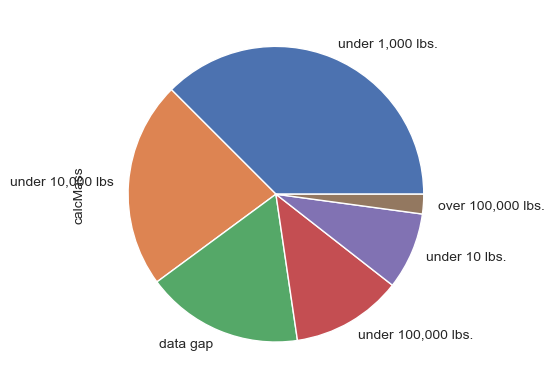

In [19]:
c1 = master_df.bgCAS.isin(['7732-18-5','14808-60-7','66402-68-4','1302-93-8',
                           '1302-76-7','1344-28-1','1318-16-7','308075-07-2',
                           '14464-46-1','1302-74-5'])
c2 = master_df.is_water_carrier
t = master_df[~(c1|c2)][['UploadKey','bgCAS','calcMass']].copy()
t.calcMass.fillna(0,inplace=True)
gb = t.groupby(['UploadKey','bgCAS'],as_index=False)['calcMass'].sum()
gb.calcMass = np.where(gb.calcMass==0,-1,gb.calcMass)
categ = pd.cut(gb.calcMass,bins=[-2,0,10,1000,10000,100000,10000000000],
              labels=['data gap','under 10 lbs.','under 1,000 lbs.','under 10,000 lbs', 'under 100,000 lbs.',
                      'over 100,000 lbs.'])

categ.value_counts().plot.pie()

### What do we know about the FracFocus chemicals?

In [20]:
# First how many can we resolve to a chemical industry standard ID? (CAS)
c1 = master_df.bgCAS=='ambiguousID'
c2 = master_df.bgCAS=='proprietary'
c3 = master_df.bgCAS=='conflictingID'
c4 = master_df.bgCAS.str[0].str.isnumeric()
totrec = len(master_df[master_df.ingKeyPresent])
rest = len(master_df[~(c1|c2|c3|c4)])
rest

401469

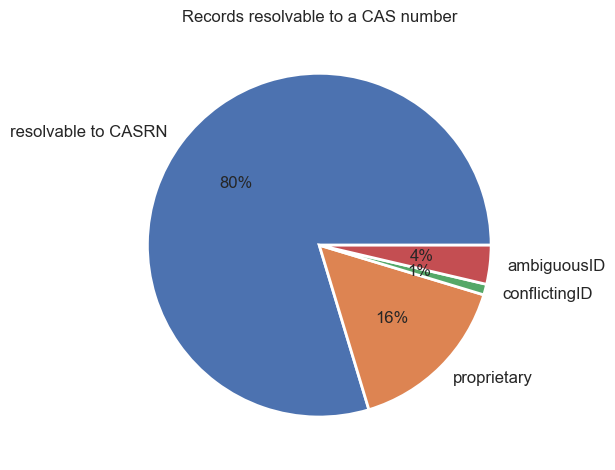

In [21]:
t = pd.DataFrame({'categ':[len(master_df[c4]),len(master_df[c2]),len(master_df[c3]),len(master_df[c1])],
                })

ax = t.plot.pie(y='categ',labels=['resolvable to CASRN','proprietary','conflictingID','ambiguousID'],legend=None,
          autopct='%.0f%%',wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'}, textprops={'size': 'large'})
ax.set_ylabel('')
ax.set_title("Records resolvable to a CAS number");
plt.tight_layout();

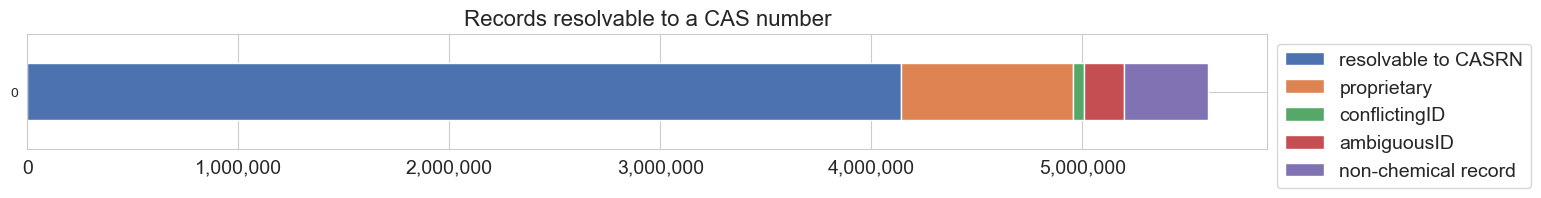

In [22]:
t = pd.DataFrame({'resolvable to CASRN':[len(master_df[c4])],
                  'proprietary':[len(master_df[c2])],
                  'conflictingID':[len(master_df[c3])],
                  'ambiguousID':[len(master_df[c1])],
                  'non-chemical record':[rest]
                  
                })

ax = t.plot.barh(stacked=True,
            figsize=(16,1.5),
           xlabel='all records');
ax.set_title('Records resolvable to a CAS number',fontsize=16)
# ax.set_ylabel('all records',fontsize=14)
ax.set_xlabel('',fontsize=14)
plt.xticks(fontsize=14,rotation = 0);
ax = gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=14);
# plt.legend(loc='upper left');

Number with fingerprint: 673, that are mostly known: 365


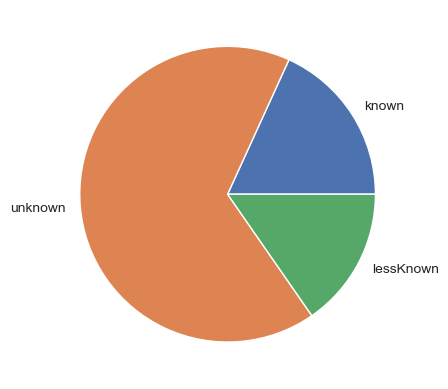

In [23]:
finger = pd.read_csv(r"C:\MyDocs\OpenFF\src\testing\tmp\DTXSID_caught.csv")
finger.columns

dcols = ['HH: Oral', 'HH: Inhalation',
       'HH: Dermal', 'HH: Carcinogenicity', 'HH: Genotoxicity Mutagenicity',
       'HH: Endocrine Disruption', 'HH: Reproductive', 'HH: Developmental',
       'HH: Neurotoxicity: Repeat Exposure',
       'HH: Neurotoxicity: Single Exposure',
       'HH: Systemic Toxicity: Repeat Exposure',
       'HH: Systemic Toxicity: Single Exposure', 'HH: Skin Sensitization',
       'HH: Skin Irritation', 'HH: Eye Irritation',
       'Ecotoxicity: Acute Aquatic Toxicity',
       'Ecotoxicity: Chronic Aquatic Toxicity', 'Fate: Persistence',
       'Fate: Bioaccumulation', 'Fate: Exposure']
for col in dcols:
    finger[col] = np.where(finger[col]=='I',np.NAN,finger[col])
                           
finger['known'] = finger[['HH: Oral', 'HH: Inhalation',
       'HH: Dermal', 'HH: Carcinogenicity', 'HH: Genotoxicity Mutagenicity',
       'HH: Endocrine Disruption', 'HH: Reproductive', 'HH: Developmental',
       'HH: Neurotoxicity: Repeat Exposure',
       'HH: Neurotoxicity: Single Exposure',
       'HH: Systemic Toxicity: Repeat Exposure',
       'HH: Systemic Toxicity: Single Exposure', 'HH: Skin Sensitization',
       'HH: Skin Irritation', 'HH: Eye Irritation',
       'Ecotoxicity: Acute Aquatic Toxicity',
       'Ecotoxicity: Chronic Aquatic Toxicity', 'Fate: Persistence',
       'Fate: Bioaccumulation', 'Fate: Exposure']].count(axis='columns')
finger[['CASRN','known']]
print(f'Number with fingerprint: {len(finger)}, that are mostly known: {len(finger[finger.known>9])}')
known = len(finger[finger.known>9])
lessKnown = len(finger[finger.known<10])
unknown = len(master_df[master_df.bgCAS.str[0].str.isnumeric()].bgCAS.unique())

plt.pie([known,unknown,lessKnown],labels=['known','unknown','lessKnown']);

In [24]:
c5 = master_df.bgCAS.isin(finger.CASRN.unique().tolist())
c6 = master_df.bgCAS.isin(finger[finger.known>9].CASRN.unique().tolist())

print(f'Records resolvable: {len(master_df[c4])}, Chem has ChemInfo profile {len(master_df[c5])}, Chem has profile w/o majority unknown: {len(master_df[c6])}') 

Records resolvable: 4139235, Chem has ChemInfo profile 2703353, Chem has profile w/o majority unknown: 1773160


# Number of chemicals added each year


In [9]:
years = range(2014,master_df.date.dt.year.max()+1)
y_in = []
num = []
added = []
last = 0
for y in years:
    c = master_df.date.dt.year<=y
    y_in.append(y)
    n = len(master_df[c].bgCAS.unique())-4
    num.append(n)
    added.append(n-last)
    last = n
t = pd.DataFrame({'year':y_in,'total_chem':num,'added':added})
t

year  total_chem  added
0  2014         952    952
1  2015        1073    121
2  2016        1128     55
3  2017        1175     47
4  2018        1221     46
5  2019        1261     40
6  2020        1288     27
7  2021        1317     29
8  2022        1328     11
9  2023        1334      6

# Freq of masses by year


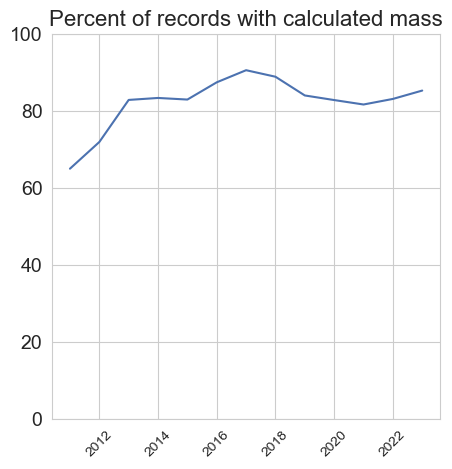

In [25]:
t = master_df[~master_df.bgCAS.isin(['ambiguousID','sysAppMeta'])][['date','calcMass']].copy()
t['year'] = t.date.dt.year
gb1 = t.groupby('year',as_index=False).size().rename({'size':'tot'},axis=1)
gb2 = t[t.calcMass>0].groupby('year',as_index=False).size().rename({'size':'has_mass'},axis=1)
mg = pd.merge(gb1,gb2,on='year',how='inner')
mg['perc'] = mg.has_mass/mg.tot*100
ax = mg.plot('year','perc',legend=None, xlabel='',figsize=(5,5),ylim=(0,100))
ax.set_title('Percent of records with calculated mass',fontsize=16)
# plt.tight_layout()
plt.xticks(rotation = 45,fontsize=10) ;
plt.yticks(fontsize=14) ;
plt.savefig(os.path.join(image_dir,'percentCalcMass.jpg'),dpi=150)

---
<a id='water_use'></a>
# Water use

## Gallons used, recorded as TotalBaseWaterVolume

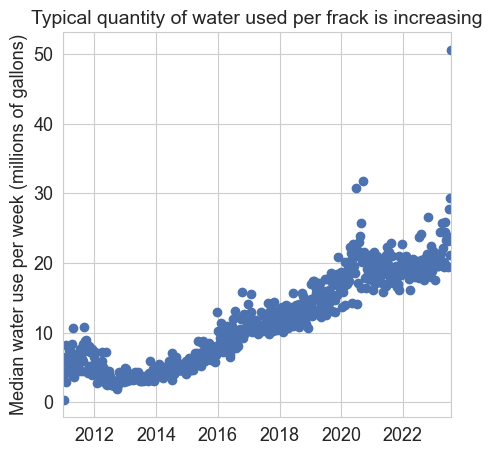

In [26]:
alldf = master_df.groupby('UploadKey',as_index=False)[['date','TotalBaseWaterVolume','APINumber','bgStateName']].first()
gb1 = alldf.groupby('date')['TotalBaseWaterVolume'].median()
gb1 = gb1/1000000
allwk_tbwv = gb1.resample("W").max()
ax = allwk_tbwv.plot(figsize=(5,5), ylabel='Median gallons of water each week',style='o',xlabel='');
ax.set_title('Typical quantity of water used per frack is increasing',fontsize=14);
ax.tick_params(axis="y", labelsize=13)
ax.tick_params(axis="x", labelsize=13)
plt.ylabel('Median water use per week (millions of gallons)',fontsize=13);
# ax = gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig(os.path.join(image_dir,'median_water_used.jpg'),dpi=150)


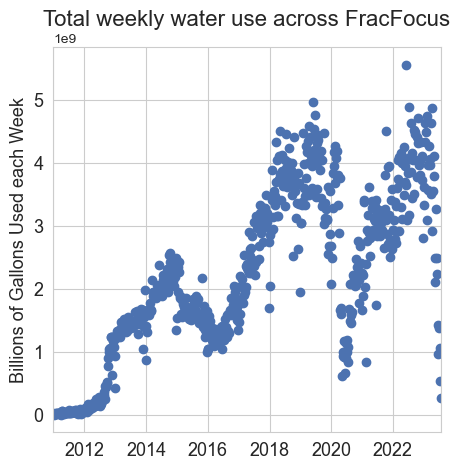

In [27]:
gb3 = alldf.groupby('date')['TotalBaseWaterVolume'].sum()
allwk_tbwv_sum = gb3.resample("W").sum()
ax = allwk_tbwv_sum.plot(figsize=(5,5), style='o',xlabel='');
ax.set_title('Total weekly water use across FracFocus',fontsize=16);
ax.tick_params(axis="y", labelsize=13)
ax.tick_params(axis="x", labelsize=13)
plt.ylabel('Billions of Gallons Used each Week',fontsize=13);
# plt.suptitle('Data for most recent months probably relects publication delays.',fontsize=10);
#ax = gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig(os.path.join(image_dir,'total_water_used.jpg'),dpi=150)


In [28]:
#NOT USED

# gb1 = alldf.groupby('date')['TotalBaseWaterVolume'].max()

# gb2 = gb1[gb1<100000000]
# allwk_tbwv = gb2.resample("W").max()
# ax = allwk_tbwv.plot(figsize=(5,5), ylabel='Max Water Volume Used By Week',style='o',xlabel='');
# ax.set_title('Single maximum water use is increasing',fontsize=14);
# plt.suptitle('All values over 100,000,000 gallons excluded',fontsize=10);
# ax.tick_params(axis="y", labelsize=13)
# ax.tick_params(axis="x", labelsize=13)
# plt.ylabel('Million of Gallons Used in single event',fontsize=13);
# ax = gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.savefig(os.path.join(image_dir,'max_water_used.jpg'),dpi=150)

In [29]:
#NOT USED
# # print('Disclosures over 100 million gallons')
# summary = alldf[alldf.TotalBaseWaterVolume>100000000].groupby('date',as_index=False)[['TotalBaseWaterVolume','APINumber','bgStateName']].first()
# ax =summary.plot('date','TotalBaseWaterVolume',style='o',color='red',ylim=(0,1100000000),
#                 legend=False)
# # ax = summary.plot(figsize=(5,5), ylabel='Water Volume Used',style='o');
# ax.set_title('Fracks using more than 100,000,000 gallons\n are increasing',fontsize=16);
# ax = gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.savefig(os.path.join(image_dir,'massive_water_used.jpg'),dpi=300)

In [30]:
#NOT USED
# summary.TotalBaseWaterVolume = summary.TotalBaseWaterVolume.map(lambda x: round_sig(x,5))
# summary.reset_index()
# summary = summary.sort_values('date')
# summary['dstr'] = summary.date.astype(str).str[:10]
# data = [['Water Vol (gal)','API number']]
# for i,row in summary.iterrows():
#     data.append([row.dstr,row.TotalBaseWaterVolume,row.APINumber])
# plot_table(data,filename='bigwater.jpg')

---
<a id='proppant'></a>
# Proppants
Most 2011- mid 2013 disclosures do not have chemical records.  Proppants are, therefore, missing in those years in the figures below.

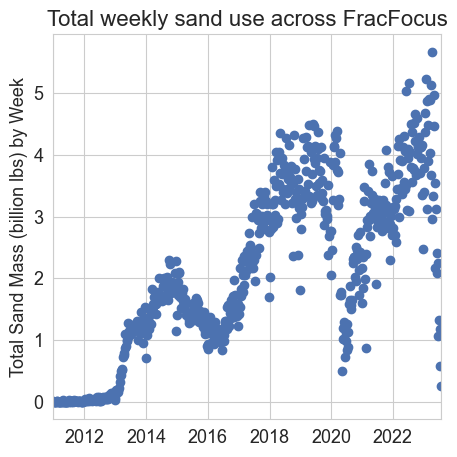

In [31]:
# gb1 = master_df.groupby('UploadKey',as_index=False)[['APINumber','date','TotalBaseWaterVolume','bgStateName']].first()
gb3 = master_df[master_df.bgCAS=='14808-60-7'].groupby('date')[['calcMass']].sum()
gb3 = gb3/1000000000
allwk_sand_sum = gb3.resample("W").sum()
otherprop = ['66402-68-4','1302-93-8','1302-76-7','1344-28-1','1318-16-7','308075-07-2','14464-46-1','1302-74-5']

ax = allwk_sand_sum.plot(figsize=(5,5),style='o',legend=None,xlabel='');
ax.set_title('Total weekly sand use across FracFocus',fontsize=16)
ax.tick_params(axis="y", labelsize=13)
ax.tick_params(axis="x", labelsize=13)
plt.ylabel('Total Sand Mass (billion lbs) by Week',fontsize=13);
# ax = gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'));
plt.savefig(os.path.join(image_dir,'total_sand_used.jpg'),dpi=150)

In [32]:
# Not used
# gb3 = master_df[master_df.bgCAS.isin(otherprop)].groupby('date')[['calcMass']].sum()
# allwk_other_sum = gb3.resample("W").sum()
# ax = allwk_other_sum.plot(figsize=(12,5), ylabel='Total other proppants Mass (lbs) By Week',style='o');
# ax.set_title('Total weekly use of "other proppants" across FracFocus',fontsize=18)
# ax = gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'));

In [33]:
# # Not used
# props = master_df[master_df.bgCAS.isin(otherprop)].groupby('bgCAS',as_index=False)['epa_pref_name'].first()
# print(f'List of "other proppants" graphed: \n{props}\n')

---
<a id='companiess'></a>
# Companies represented
- in development

In [34]:
ogb = master_df.groupby(['bgOperatorName','UploadKey'],as_index=False).size()
ogbname = master_df.groupby(['bgOperatorName'])['OperatorName'].agg(lambda x: x.value_counts().index[0])
ogbname = ogbname.reset_index()
mg = pd.merge(ogb,ogbname,on='bgOperatorName',how='left')
# ogb = ogb.groupby('bgOperatorName',as_index=False).size()
# ogb = ogb.sort_values('size',ascending=False)
# ogb.plot.barh('size','bgOperatorName')
h = mg.OperatorName.value_counts()
print(f'Total number bgOp: {len(h)}, number with fewer than 20 disc: {len(h[h<20])}, with fewer than 5: {len(h[h<5])}')

Total number bgOp: 1555, number with fewer than 20 disc: 997, with fewer than 5: 610


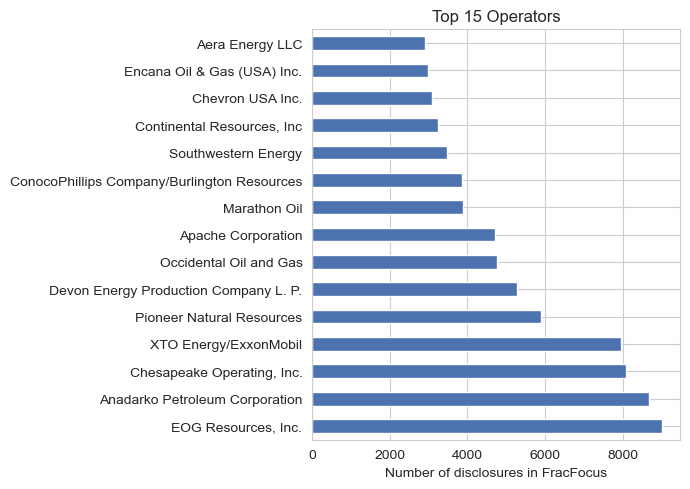

In [35]:
ax = mg.OperatorName.value_counts()[:15].plot.barh(figsize=(7,5))
ax.set_title('Top 15 Operators')
ax.set_xlabel('Number of disclosures in FracFocus');
plt.tight_layout();
plt.savefig(os.path.join(image_dir,'operators.jpg'),dpi=150)

Total number bgSup: 1591, number with fewer than 20 disc: 920, with fewer than 5: 560


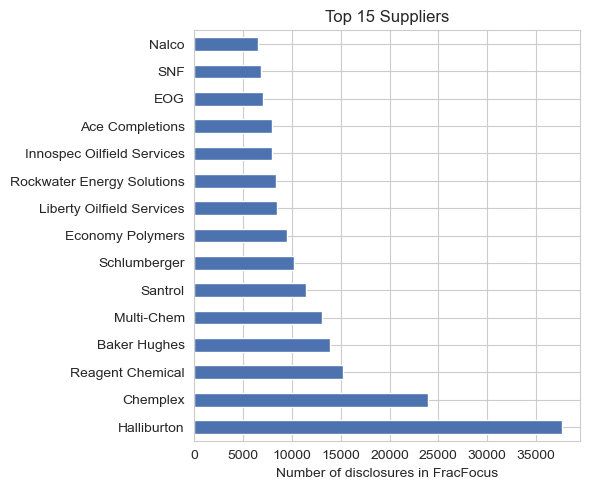

In [36]:
sgb = master_df.groupby(['bgSupplier','UploadKey'],as_index=False).size()
sgbname = master_df.groupby(['bgSupplier'])['Supplier'].agg(lambda x: x.value_counts().index[0])
sgbname = sgbname.reset_index()
mg = pd.merge(sgb,sgbname,on='bgSupplier',how='left')

x = ['MISSING','Listed Above','Operator','Customer']
mg = mg[~mg.Supplier.isin(x)]
h = mg.Supplier.value_counts()
print(f'Total number bgSup: {len(h)}, number with fewer than 20 disc: {len(h[h<20])}, with fewer than 5: {len(h[h<5])}')

ax = mg.Supplier.value_counts()[:15].plot.barh(figsize=(6,5))
ax.set_xlabel('Number of disclosures in FracFocus');
ax.set_title('Top 15 Suppliers');
plt.tight_layout();
plt.savefig(os.path.join(image_dir,'suppliers.jpg'),dpi=150)